In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo

In [2]:
arrests_df = pd.read_csv('Arrests.csv')

In [3]:
arrests_df = arrests_df.drop(['Unnamed: 0'], axis=1)

In [4]:
arrests_df.head()

,released,colour,year,age,sex,employed,citizen,checks
0,Yes,White,2002,21,Male,Yes,Yes,3
1,No,Black,1999,17,Male,Yes,Yes,3
2,Yes,White,2000,24,Male,Yes,Yes,3
3,No,Black,2000,46,Male,Yes,Yes,1
4,Yes,Black,1999,27,Female,Yes,Yes,1


In [5]:
# 1 What is the distribution of the "released" variable? How many arrestees were released with a summons versus not released?
# 2 How does the distribution of the "colour" variable look like? What is the racial composition of the arrestees?
# 3 How does the number of observations vary across different years in the "year" variable?
# 4 What is the range of ages among the arrestees? Are there any outliers?
# 5 What is the distribution of the "sex" variable? How many female and male arrestees are there?
# 6 How many arrestees are employed versus unemployed?
# 7 What is the citizenship status of the arrestees? How many are citizens and how many are not?
# 8 How many police databases, on average, did the arrestees' names appear in the "checks" variable?
# 9 Is there any correlation between the "released" variable and other variables such as race, age, sex, employment, citizenship, or number of checks?
# 10 Is there a significant difference in the average number of checks between different racial groups?
# 11 Is there a significant difference in the average age between male and female arrestees?
# 12 Are there any notable trends or patterns in the data over the years?

# 1. What is the distribution of the "released" variable? How many arrestees were released with a summons versus not released?
# 2. How does the distribution of the "colour" variable look like? What is the racial composition of the arrestees?
# 5. What is the distribution of the "sex" variable? How many female and male arrestees are there?
# 6. How many arrestees are employed versus unemployed?
# 7. What is the citizenship status of the arrestees? How many are citizens and how many are not?

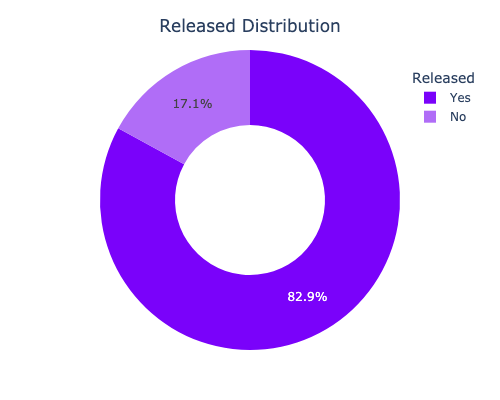

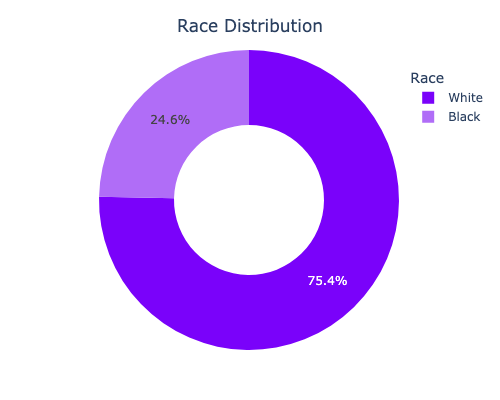

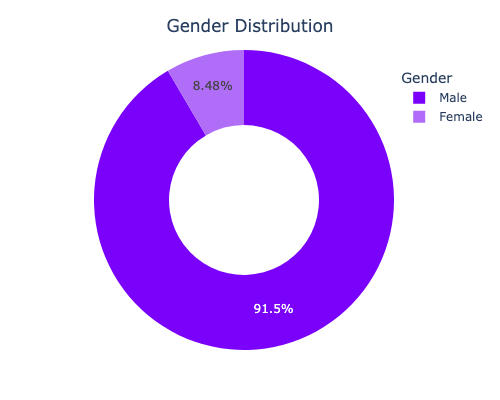

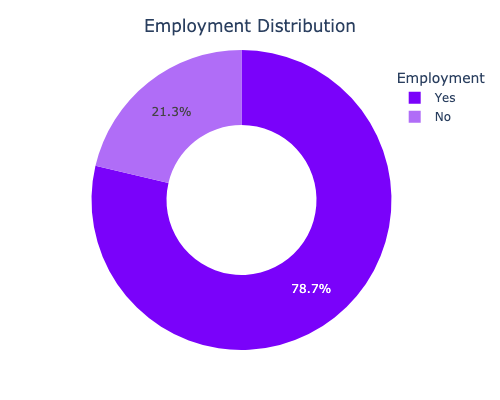

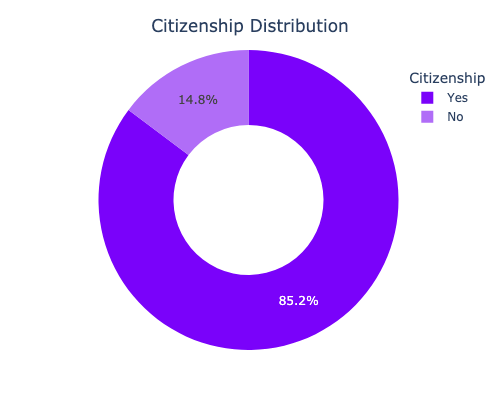

In [6]:
dic_cols = {
    'released': 'Released',
    'colour': 'Race',
    'sex': 'Gender',
    'employed': 'Employment',	
    'citizen' : 'Citizenship'
}

for col, title in dic_cols.items():
    df = arrests_df[col].value_counts().reset_index(name='count')
    custom_palette = ['#7a02fa','#b06df7']
    fig = px.pie(df, values='count', names=col,color_discrete_sequence=custom_palette, hole=.5)
    fig.update_layout(
        xaxis_title=title,
        yaxis_title='Count',
        title={
            'text': f'{title} Distribution',
            'x': 0.5,
            'y': 0.95,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        width=500,
        height=400,
        margin=dict(l=50, r=50, t=50, b=50), 
        legend=dict(
            title=title,
            orientation='v',
            yanchor='top',
            y=0.95,
            xanchor='left',
            x=0.9
        ),
    )
    fig.show("png")

# 3. How does the number of observations vary across different years in the "year" variable?

In [17]:
df = arrests_df['year'].value_counts().reset_index(name='count')
fig = px.bar(df, x='year', y='count', barmode='group', color_discrete_sequence=custom_palette)
fig.update_layout(
    bargap=0.01,
    xaxis_title='Year',
    yaxis_title='Count',
    title={
        'text': f'Distribution By Year',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=700,
    height=400,
    margin=dict(l=50, r=50, t=50, b=50),
)
pyo.iplot(fig)

# 4. What is the range of ages among the arrestees? Are there any outliers?

In [18]:
df = arrests_df['age'].value_counts().reset_index(name='count')
fig = px.bar(df, x='age', y='count', barmode='group', color_discrete_sequence=custom_palette,orientation='v')
fig.update_layout(
    bargap=0.4,
    xaxis_title='Age',
    yaxis_title='Count',
    title={
        'text': f'Distribution By Age',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    width=700,
    height=400,
    margin=dict(l=50, r=50, t=50, b=50),
)
pyo.iplot(fig)

# 8. How many police databases, on average, did the arrestees' names appear in the "checks" variable?

In [19]:
print(f"Average for database checks is {arrests_df['checks'].mean()}")
arrests_df['checks'].value_counts().sort_index()

Average for database checks is 1.6364332185227708


checks
0    1851
1     854
2     789
3     953
4     643
5     127
6       9
Name: count, dtype: int64

# 9. Is there any correlation between the "released" variable and other variables such as race, age, sex, employment, citizenship, or number of checks?

In [20]:

import plotly.express as px

dic_cols = {
    'sex':'Gender',
    'age': 'Age', 
    'colour': 'Race', 
    'employed': 'Employment', 
    'citizen' : 'Citizenship'
}

for col, title in dic_cols.items():
    released_df = arrests_df[['released', col]].value_counts().reset_index(name='count')
    custom_palette = ['#7a02fa','#b06df7']
    if col == 'age':
        fig = px.bar(released_df, x=col, y='count', color='released', barmode='stack', color_discrete_sequence=custom_palette)
    else:
        fig = px.bar(released_df, x='released', y='count', color=col,barmode='group', color_discrete_sequence=custom_palette)
    fig.update_layout(
        xaxis_title='Release',
        yaxis_title='Count',
        title={
            'text': f'Released Individuals by {title}',
            'x': 0.5,
            'y': 0.95,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        width=700,
        height=400,
        margin=dict(l=50, r=50, t=50, b=50), 
        legend=dict(
            title=title,
            orientation='v',
            yanchor='top',
            y=0.95,
            xanchor='left',
            x=0.8
        ),
    )
    pyo.iplot(fig)

# 10. Is there a significant difference in the average number of checks between different racial groups?

In [21]:
average = arrests_df[['checks', 'colour']].groupby(['colour']).agg({'checks': 'mean'})
total = arrests_df[['checks', 'colour']].groupby(['colour']).agg({'checks': 'sum'})
print(average)
print(total)

          checks
colour          
Black   2.099379
White   1.485018
        checks
colour        
Black     2704
White     5848


# 11. Is there a significant difference in the average age between male and female arrestees?

In [22]:
average = arrests_df[['age', 'sex']].groupby(['sex']).agg({'age': 'mean'})
print(average)

              age
sex              
Female  23.532731
Male    23.875601
